## Capstone Project - The Battle of Neighborhoods (Week 2) - Python Code to accomplish project goal

### 2. Data

2.1 Description of Data
This project will rely on public data from Wikipedia and Foursquare.

2.1.1 Dataset 1:
In this project, Greater London Area will be used for analysis. Within the Greater London Area, there are areas that are within the London Area Postcode. The focus of this project will be the nieghborhoods and venues to be explored that are within the London Post Code area.

The London Area consists of 32 Boroughs and the "City of London". Our data will be from the link - Greater London Area <https://en.wikipedia.org/wiki/List_of_areas_of_London >

The web scrapped of the Wikipedia page for the Greater London Area data is provided below:

In [2]:
# library to handle data in a vectorized manner
import numpy as np

# library for data analsysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json
print('numpy, pandas, ..., imported...')

!pip -q install geopy
# conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
print('geopy installed...')
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
print('Nominatim imported...')

# library to handle requests
import requests
print('requests imported...')

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize
print('json_normalize imported...')

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
print('matplotlib imported...')

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Kmeans imported...')

# install the Geocoder
!pip -q install geocoder
import geocoder

# import time
import time

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip -q install folium
print('folium installed...')
import folium # map rendering library
print('folium imported...')
print('...Done')

numpy, pandas, ..., imported...
geopy installed...
Nominatim imported...
requests imported...
json_normalize imported...
matplotlib imported...
Kmeans imported...
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB 

In [3]:
# library for BeautifulSoup

!pip install beautifulsoup4
from bs4 import BeautifulSoup

     |████████████████████████████████| 112kB 8.1MB/s eta 0:00:01


In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_areas_of_London'
#headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0'}
wikipedia_page = requests.get(url)
wikipedia_page

<Response [200]>

In [6]:
soup = BeautifulSoup(wikipedia_page.content, 'html.parser')
# This extracts the "tbody" within the table where class is "wikitable sortable"
table = soup.find('table', {'class':'wikitable sortable'}).tbody

In [7]:
# Extracts all "tr" (table rows) within the table above
rows = table.find_all('tr')

In [8]:
# Extracts the column headers, removes and replaces possible '\n' with space for the "th" tag
columns = [i.text.replace('\n', '')
           for i in rows[0].find_all('th')]

columns

['Location',
 'London\xa0borough',
 'Post town',
 'Postcode\xa0district',
 'Dial\xa0code',
 'OS grid ref']

In [9]:
df = pd.DataFrame(columns = columns)
df

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref


In [10]:
# Extracts every row with corresponding columns
# Then appends the values to the create pd dataframe "df"
# Please note that the first row (row[0]) is skipped because it is already the header
for i in range(1, len(rows)):
    tds = rows[i].find_all('td')
    
    
    if len(tds) == 7:
        values = [tds[0].text, tds[1].text, tds[2].text.replace('\n', ''.replace('\xa0','')), tds[3].text, tds[4].text.replace('\n', ''.replace('\xa0','')), tds[5].text.replace('\n', ''.replace('\xa0','')), tds[6].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values = [td.text.replace('\n', '').replace('\xa0','') for td in tds]
        
        df = df.append(pd.Series(values, index = columns), ignore_index = True)

        df.head(5)

In [11]:
len(rows)

534

In [12]:
df.head(5)

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


In [13]:
df = df.rename(index=str, columns = {'Location': 'Location', 'London\xa0borough': 'Borough', 'Post town': 'Post-town', 
                                     'Postcode\xa0district': 'Postcode', 'Dial\xa0code': 'Dial-code', 'OS grid ref': 'OSGridRef'})

In [14]:
df.head()

,Location,Borough,Post-town,Postcode,Dial-code,OSGridRef
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


In [15]:
#under the Borough, there are borough names with []. These are references extracted from the wiki page. So remove these..

df['Borough'] = df['Borough'].map(lambda x: x.rstrip(']').rstrip('0123456789').rstrip('['))

In [16]:
df.head()

,Location,Borough,Post-town,Postcode,Dial-code,OSGridRef
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon,CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon,CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


Due to many areas, neighborhoods and venues in London, having to overcome limitations with Foursquare API calls, Assumptions are made by selecting only South East London

##### Assumption 1: Where the Postcode are more than one, (like Albany Park, there are 2 postcodes, the postcodes are spread to multi-rows and assigned the same values from the other columns.

In [17]:
df0 = df.drop('Postcode', axis=1).join(df['Postcode'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Postcode'))

In [18]:
df0.head()

,Location,Borough,Post-town,Dial-code,OSGridRef,Postcode
0,Abbey Wood,"Bexley, Greenwich",LONDON,020,TQ465785,SE2
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,020,TQ205805,W3
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,020,TQ205805,W4
10,Angel,Islington,LONDON,020,TQ345665,EC1
10,Angel,Islington,LONDON,020,TQ345665,N1


##### Assumption 2: From the data, only the 'Location', 'Borough', 'Postcode', 'Post-town' will be used for this project. So they are extracted into a new data frame

In [19]:

df1 = df0[['Location', 'Borough', 'Postcode', 'Post-town']].reset_index(drop=True)

##### Assumption 3: Now, only the Boroughs with London Post-town will be used for our search of location. Therefore, all the non-post-town are dropped.

In [20]:
df2 = df1
df21 = df2[df2['Post-town'].str.contains('LONDON')]

In [21]:
df21.head(5)

,Location,Borough,Postcode,Post-town
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON
1,Acton,"Ealing, Hammersmith and Fulham",W3,LONDON
2,Acton,"Ealing, Hammersmith and Fulham",W4,LONDON
3,Angel,Islington,EC1,LONDON
4,Angel,Islington,N1,LONDON


In [22]:
# Drop Post-Town as it contains London. It is understood that we will analyse only areas belonging to London posttown

# Re-assigns the df21 to new dataframe without the Post-town
df3 = df21[['Location', 'Borough', 'Postcode']].reset_index(drop=True)

In [23]:
df_london = df3
df_london.to_csv('LondonLocations.csv', index = False)

##### Assumption 4: Due to its more diverse outlook, proximity to all markets and accessible facilities, only the South East areas of London will be considered for our analysis. The South East areas has postcodes starting with SE.

In [24]:
df_london.Postcode = df_london.Postcode.str.strip()

In [25]:
# New dataframe for South East London postcodes
df_se = df_london[df_london['Postcode'].str.startswith(('SE'))].reset_index(drop=True)

In [26]:
df_se.head()

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Crofton Park,Lewisham,SE4
2,Crossness,Bexley,SE2
3,Crystal Palace,Bromley,SE19
4,Crystal Palace,Bromley,SE20


##### Assumption 5: This assumption will focus on the demography of London where there are predominantly more multicultural groups. According to the proportion of races by London borough as seen in Demography of London, the top 5 races or ethnics are shown below:

In [27]:
demograph_link = 'https://en.wikipedia.org/wiki/Demography_of_London'
#headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0'}
demograph_page = requests.get(demograph_link)
soup1 = BeautifulSoup(demograph_page.content, 'html.parser')
table1 = soup1.find('table', {'class':'wikitable sortable'}).tbody
rows1 = table1.find_all('tr')
columns1 = [i.text.replace('\n', '')
           for i in rows1[0].find_all('th')]

In [28]:
columns1

['Local authority', 'White', 'Mixed', 'Asian', 'Black', 'Other']

In [29]:
#Dataframe demo_london to store demographic dataset
demo_london = pd.DataFrame(columns = columns1)

In [30]:
for j in range(1, len(rows1)):
    tds1 = rows1[j].find_all('td')
    if len(tds1) == 7:
        values1 = [tds1[0].text, tds1[1].text, tds1[2].text.replace('\n', ''.replace('\xa0','')), tds1[3].text, tds1[4].text.replace('\n', ''.replace('\xa0','')), tds1[5].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values1 = [td1.text.replace('\n', '').replace('\xa0','') for td1 in tds1]
        
        demo_london = demo_london.append(pd.Series(values1, index = columns1), ignore_index = True)

        demo_london

In [31]:
demo_london.head(5)

,Local authority,White,Mixed,Asian,Black,Other
0,Barnet,64.1,4.8,18.5,7.7,4.8
1,Barking and Dagenham,58.3,4.2,15.9,20,1.6
2,Bexley,81.9,2.3,6.6,8.5,0.8
3,Brent,36.3,5.1,34.1,18.8,5.8
4,Bromley,84.3,3.5,5.2,6,0.9


In [32]:
demo_london['Black'] = demo_london['Black'].astype('float')

In [33]:
demo_london_sorted = demo_london.sort_values(by='Black', ascending = False)

In [34]:
demo_london_sorted.head(5)

,Local authority,White,Mixed,Asian,Black,Other
22,Lewisham,53.5,7.4,9.3,27.2,2.6
27,Southwark,54.3,6.2,9.4,26.9,3.3
21,Lambeth,57.1,7.6,6.9,25.9,2.4
11,Hackney,54.7,6.4,10.5,23.1,5.3
7,Croydon,55.1,6.6,16.4,20.2,1.8


##### Our main assumption: This will be the top 5 areas significantly high "Black", "Asian", "Mixed" and other races. These leaves us with Lewisham, Southwark, Lambeth, Hackney and Croydon.

In [35]:
# Let us see the data in dataframe df_se i.e. belonging to South east london

df_se.head(20)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Crofton Park,Lewisham,SE4
2,Crossness,Bexley,SE2
3,Crystal Palace,Bromley,SE19
4,Crystal Palace,Bromley,SE20
5,Crystal Palace,Bromley,SE26
6,Denmark Hill,Southwark,SE5
7,Deptford,Lewisham,SE8
8,Dulwich,Southwark,SE21
9,East Dulwich,Southwark,SE22


In [36]:

df_se_top = df_se[df_se['Borough'].isin(['Lewisham', 'Southwark', 'Lambeth', 'Hackney', 'Croydon'])].reset_index(drop=True)

In [37]:
df_se_top.head(5)

,Location,Borough,Postcode
0,Crofton Park,Lewisham,SE4
1,Denmark Hill,Southwark,SE5
2,Deptford,Lewisham,SE8
3,Dulwich,Southwark,SE21
4,East Dulwich,Southwark,SE22


In [38]:
df_se_top.shape

(46, 3)

Our dataset is reduced to 92 rows with 3 columns now having selected boroughs belonging to above said and post codes SE

#### 2.1.2 Dataset 2:

In obtaining the location data of the locations, the Geocoder package is used with the arcgis_geocoder to obtain the latitude and longitude of the needed locations.

These will help to create a new dataframe that will be used subsequently for the South East London areas.

In [39]:
# Geocoder starts here
# Defining a function to use --> get_latlng()'''
def get_latlng(arcgis_geocoder):
    
    # Initialize the Location (lat. and long.) to "None"
    lat_lng_coords = None
    
    # While loop helps to create a continous run until all the location coordinates are geocoded
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, London, United Kingdom'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords
# Geocoder ends here

In [40]:
sample = get_latlng('SE2')
sample

[51.492450000000076, 0.12127000000003818]

In [46]:
start = time.time()

postal_codes = df_se_top['Postcode']    
coordinates = [get_latlng(postal_code) for postal_code in postal_codes.tolist()]

end = time.time()

In [47]:
print("Time of execution: ", end - start, "seconds")

Time of execution:  24.708261013031006 seconds


Then we proceed to store the location data - latitude and longitude as follows. The obtained coordinates are then joined to df_se_topto create new data frame.

In [49]:
df_se_loc = df_se_top

# The obtained coordinates (latitude and longitude) are joined with the dataframe as shown
df_se_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
df_se_loc['Latitude'] = df_se_coordinates['Latitude']
df_se_loc['Longitude'] = df_se_coordinates['Longitude']

In [50]:
df_se_loc.head(5)

,Location,Borough,Postcode,Latitude,Longitude
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313
2,Deptford,Lewisham,SE8,51.48114,-0.02467
3,Dulwich,Southwark,SE21,51.44100,-0.08897
4,East Dulwich,Southwark,SE22,51.45256,-0.07076


In [51]:
df_se_loc.to_csv('SELondonLocationsCoordinates.csv', index = False)

In [52]:
df_se_loc.shape

(46, 5)

##### 2.1.3 Dataset 3:
The Foursquare API will be used to obtain the South East London Area venues for the geographical location data . These will be used to explore the neighbourhoods of London acordingly.

The venues within the neighbourhoods of South East London like the areas's restaurants and proximity to amenities would be correlated. Also, accessibility and ease of supplies would be considered as it relates to venues.

To use the Foursquare API, we define the Foursquare Credentials and Version as shown below:

In [53]:
CLIENT_ID = '0CMS2KAHB5YBJIOQ2PSF5143BZGFSXMRRBQDMR0UBFIQSDMR' # your Foursquare ID
CLIENT_SECRET = 'V1RXSZNQJWDJDVZNZZCKIZRKHPMGHRXAXKUVWMH5OQKMIWFX' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

#### 3.Exploratory Data Analysis

##### 3.1 Single Neighbourhood

An initial exploration of a single Neighbourhood within the London area was done here. The Lewisham Borough postcode SE13 and Location - Lewisham is used for this.

In [54]:
se_df = df_se_loc.reset_index().drop('index', axis = 1)

In [55]:
se_df.shape

(46, 5)

In [56]:
se_df.loc[se_df['Location'] == 'Lewisham']

,Location,Borough,Postcode,Latitude,Longitude
20,Lewisham,Lewisham,SE13,51.46196,-0.00754


In [58]:
se_df.loc[20, 'Location']

'Lewisham'

In [60]:
lewisham_lat = se_df.loc[20, 'Latitude']
lewisham_long = se_df.loc[20, 'Longitude']
lewisham_loc = se_df.loc[20, 'Location']
lewisham_postcode = se_df.loc[20, 'Postcode']

print('The latitude and longitude values of {} with postcode {}, are {}, {}.'.format(lewisham_loc,
                                                                                         lewisham_postcode,
                                                                                         lewisham_lat,
                                                                                         lewisham_long))

The latitude and longitude values of Lewisham with postcode SE13, are 51.46196000000003, -0.007539999999949032.


In [61]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lewisham_lat, 
    lewisham_long, 
    radius, 
    LIMIT)

# displays URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=0CMS2KAHB5YBJIOQ2PSF5143BZGFSXMRRBQDMR0UBFIQSDMR&client_secret=V1RXSZNQJWDJDVZNZZCKIZRKHPMGHRXAXKUVWMH5OQKMIWFX&v=20180604&ll=51.46196000000003,-0.007539999999949032&radius=2000&limit=100'

In [62]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eaf2d51c94979001be691f2'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Lewisham Central',
  'headerFullLocation': 'Lewisham Central, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 186,
  'suggestedBounds': {'ne': {'lat': 51.47996001800005,
    'lng': 0.021296961190459426},
   'sw': {'lat': 51.44395998200002, 'lng': -0.03637696119035749}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '535823bc498ec8d8da9aad5f',
       'name': 'Street Feast Model Market',
       'location': {'address': '196 Lewisham High St',
        'crossStreet': 'entrance at Molesworth St',
        'lat': 51.46020945743763,
        'lng': -0.01

In [63]:

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [64]:
    venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
nearby_venues

,name,categories,lat,lng
0,Street Feast Model Market,Street Food Gathering,51.460209,-0.012199
1,Maggie's Kitchen,Café,51.465380,-0.011213
2,Gennaro Delicatessan,Deli / Bodega,51.461765,-0.009726
3,Levante restaurant,Restaurant,51.462072,-0.009491
4,Dirty South,Pub,51.458846,-0.002666
5,Levante Pide Restaurant,Turkish Restaurant,51.459848,-0.011476
6,Corte,Coffee Shop,51.459776,-0.011554
7,Manor House Gardens,Park,51.456686,0.004684
8,The Sausage Man,Food Truck,51.462507,-0.010248
9,Côte Brasserie,French Restaurant,51.467378,0.007176


In [66]:
nearby_venues_lewisham_unique = nearby_venues['categories'].value_counts().to_frame(name='Count')

In [67]:
nearby_venues_lewisham_unique.head(5)

,Count
Pub,13
Café,8
Park,6
Gastropub,5
Garden,4


##### Even though there are restaurants are the Lewisham area, they are not even in the top 5 venues!!.
Note, we have limited data to justify perspective and findings

In [68]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


##### 3.2 Multiple Neighbourhoods
Now let's explore (Multiple) Neighborhoods in the South East London area.

To do this, the function getNearbyVenues is used and it's created to repeat the same process for all neighborhoods.

In [74]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [75]:
se_venues = getNearbyVenues(names=se_df['Location'],
                                   latitudes=se_df['Latitude'],
                                   longitudes=se_df['Longitude']
                                  )

Crofton Park
Denmark Hill
Deptford
Dulwich
East Dulwich
Elephant and Castle
Elephant and Castle
Elephant and Castle
Bankside
Forest Hill
Gipsy Hill
Gipsy Hill
Grove Park
Herne Hill
Hither Green
Honor Oak
Ladywell
Ladywell
Lambeth
Lee
Lewisham
New Cross
Newington
Newington
Nunhead
Oval
Bellingham
Peckham
Rotherhithe
Selhurst
Bermondsey
South Norwood
Southend
St Johns
Surrey Quays
Tulse Hill
Tulse Hill
Upper Norwood
Walworth
Blackheath
West Norwood
Brixton
Brockley
Camberwell
Catford
Chinbrook


In [73]:
len(se_venues)

NameError: name 'se_venues' is not defined

In [76]:
se_venues['Neighbourhood'].value_counts()
se_venues.to_csv('se_venues.csv')

In [77]:
se_venues.head(5)

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Crofton Park,51.46268,-0.03558,The Orchard,51.463678,-0.035699,Gastropub
1,Crofton Park,51.46268,-0.03558,Brockley's Rock,51.459457,-0.033868,Fish & Chips Shop
2,Crofton Park,51.46268,-0.03558,Saka Maka,51.464826,-0.036437,Indian Restaurant
3,Crofton Park,51.46268,-0.03558,Masala Wala,51.465652,-0.036007,Pakistani Restaurant
4,Crofton Park,51.46268,-0.03558,Waterintobeer,51.463712,-0.038826,Beer Store


In [78]:
se_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Bankside,100,100,100,100,100,100
Bellingham,68,68,68,68,68,68
Bermondsey,100,100,100,100,100,100
Blackheath,93,93,93,93,93,93
Brixton,100,100,100,100,100,100
Brockley,100,100,100,100,100,100
Camberwell,100,100,100,100,100,100
Catford,68,68,68,68,68,68
Chinbrook,50,50,50,50,50,50


In [79]:
print('There are {} uniques categories.'.format(len(se_venues['Venue Category'].unique())))

There are 196 uniques categories.


In [80]:
se_venue_unique_count = se_venues['Venue Category'].value_counts().to_frame(name='Count')

In [87]:
se_venue_unique_count.head(5)

,Count
Pub,413
Coffee Shop,302
Café,273
Park,232
Grocery Store,173


In [83]:
se_venue_unique_count.describe()

,Count
count,196.000000
mean,21.454082
std,47.948187
min,1.000000
25%,3.000000
50%,8.000000
75%,17.250000
max,413.000000


#### 3.3 Data Visualisation

In this section,  neighbourhoods in South East London will be clustered based on the processed data obtained above.

In [84]:
address = 'London, United Kingdom'

geolocator = Nominatim(user_agent="ln_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [85]:
# df_london_coordinates
map_london = folium.Map(location = [latitude, longitude], zoom_start = 12)
map_london

In [86]:
# Adding markers to map
for lat, lng, borough, loc in zip(se_df['Latitude'], 
                                  se_df['Longitude'],
                                  se_df['Borough'],
                                  se_df['Location']):
    label = '{} - {}'.format(loc, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_london)  
    
display(map_london)

In [88]:
type(se_df)

pandas.core.frame.DataFrame

In [89]:
se_df.dtypes

Location      object
Borough       object
Postcode      object
Latitude     float64
Longitude    float64
dtype: object

#### 3.4 Analysing neighborhoods

In [90]:
# one hot encoding
se_onehot = pd.get_dummies(se_venues[['Venue Category']], prefix = "", prefix_sep = "")

In [91]:
# add neighborhood column back to dataframe
se_onehot['Neighbourhood'] = se_venues['Neighbourhood']

In [92]:

# move neighborhood column to the first column
fixed_columns = [se_onehot.columns[-1]] + list(se_onehot.columns[:-1])
se_onehot = se_onehot[fixed_columns]

In [93]:
se_onehot.head(5)

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Stop,Café,Canal,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nature Preserve,New American Restaurant,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Roof Deck,Rugby Pitch,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Speakeasy,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Temple,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Winery,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,Crofton Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Crofton Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Crofton Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Cr

In [94]:
se_onehot.loc[se_onehot['African Restaurant'] != 0]

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Stop,Café,Canal,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nature Preserve,New American Restaurant,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Roof Deck,Rugby Pitch,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Speakeasy,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Temple,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Winery,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
140,Denmark Hill,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
618,Elephant and Castle,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
707,Elephant and Castle,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [95]:
se_onehot.loc[se_onehot['Neighbourhood'] == 'Lewisham']

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Stop,Café,Canal,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nature Preserve,New American Restaurant,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Roof Deck,Rugby Pitch,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Speakeasy,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Temple,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Winery,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
1859,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1860,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1861,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1862,Le

In [96]:
se_onehot.to_csv('selondon_onehot.csv', index = False)

In [97]:
se_onehot.shape

(4205, 197)

In [98]:
se_grouped = se_onehot.groupby('Neighbourhood').mean().reset_index()
se_grouped.head()

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Stop,Café,Canal,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nature Preserve,New American Restaurant,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Roof Deck,Rugby Pitch,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Speakeasy,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Temple,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Winery,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,Bankside,0.00,0.000000,0.0,0.0,0.010000,0.02,0.03,0.0,0.0,0.0,0.0,0.0,0.010000,0.010000,0.01,0.01,0.0,0.00,0.01,0.0,0.0,0.0,0.000000,0.02,0.000000,0.00,0.000000,0.010000,0.0,0.0,0.01,0.01,0.000000,0.0,0.000000,0.040000,0.080000,0.00,0.000000,0.01,0.00,0.00,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.01,0.01,0.01,0.00,0.0,0.01,0.0,0.010000,0.000000,0.000000,0.0,0.0,0.0,0.01,0.00,0.00,0.0,0.0,0.010000,0.000000,0.000000,0.00,0.020000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.040000,0.010000,0.010000,0.0,0.0,0.000000,0.000000,0.010000,0.01,0.0,0.080000,0.0,0.0,0.010000,0.00,0.000000,0.000000,0.040000,0.000000,0.0,0.01,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.01,0.01,0.01,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.020000,0.02,0.0,0.01,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.010000,0.040000,0.0,0.00,0.00,0.000000,0.000000,0.01,0.000000,0.0,0.0,0.000000,0.06,0.0,0.02,0.000000,0.000000,0.01,0.0,0.000000,0.0,0.0,0.0,0.0,0.01,0.03,0.000000,0.0,0.0,0.010000,0.0,0.000000,0.07,0.0,0.0,0.000000,0.0,0.0,0.010000,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.0,0.010000,0.0,0.0,0.00,0.00,0.000000
1,Bellingham,0.00,0.000000,0.0,0

In [99]:
print("Before One-hot encoding:", se_df.shape)
print("After One-hot encoding:", se_grouped.shape)

Before One-hot encoding: (46, 5)
After One-hot encoding: (40, 197)


In [100]:
se_grouped.to_csv('london_grouped.csv', index = False)

####
Grouping of each Neighbourhoods with 10 common venues:

In [101]:
num_top_venues = 10 # Top common venues needed

for hood in se_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = se_grouped[se_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----Bankside----
                   venue  freq
0            Coffee Shop  0.08
1                  Hotel  0.08
2                Theater  0.07
3         Scenic Lookout  0.06
4           Cocktail Bar  0.04
5                    Pub  0.04
6     Italian Restaurant  0.04
7          Grocery Store  0.04
8  Street Food Gathering  0.03
9             Art Museum  0.03


----Bellingham----
                  venue  freq
0         Grocery Store  0.16
1                  Park  0.09
2           Supermarket  0.07
3                   Pub  0.06
4                  Café  0.06
5  Fast Food Restaurant  0.04
6    Italian Restaurant  0.04
7           Coffee Shop  0.04
8         Train Station  0.03
9                 Trail  0.03


----Bermondsey----
                   venue  freq
0            Coffee Shop  0.08
1                  Hotel  0.08
2                Theater  0.07
3         Scenic Lookout  0.06
4           Cocktail Bar  0.04
5                    Pub  0.04
6     Italian Restaurant  0.04
7          Grocery Sto

In [102]:
# New Dataframe

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [103]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = se_grouped['Neighbourhood']

for ind in np.arange(se_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(se_grouped.iloc[ind, :], num_top_venues)

In [104]:

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bankside,Hotel,Coffee Shop,Theater,Scenic Lookout,Italian Restaurant,Grocery Store,Cocktail Bar,Pub,Street Food Gathering,Art Museum
1,Bellingham,Grocery Store,Park,Supermarket,Café,Pub,Coffee Shop,Fast Food Restaurant,Italian Restaurant,Train Station,Trail
2,Bermondsey,Hotel,Coffee Shop,Theater,Scenic Lookout,Italian Restaurant,Grocery Store,Cocktail Bar,Pub,Street Food Gathering,Art Museum
3,Blackheath,Pub,Grocery Store,Park,Coffee Shop,Café,Italian Restaurant,Garden,Supermarket,Bakery,Bus Stop
4,Brixton,Café,Coffee Shop,Pub,Park,Italian Restaurant,Middle Eastern Restaurant,Grocery Store,Pizza Place,Cocktail Bar,Bar


In [105]:
neighbourhoods_venues_sorted.to_csv('neighbourhoods_venues_sorted.csv', index = False)


In [106]:
se_grouped_clustering = se_grouped.drop('Neighbourhood', 1)

#### 4.0 Clustering of Neighborhoods

In [107]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(se_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 0, 3, 4, 1, 4, 2, 2, 1], dtype=int32)

In [108]:
kmeans.labels_[0:10]

array([0, 2, 0, 3, 4, 1, 4, 2, 2, 1], dtype=int32)

In [109]:
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [110]:
se_merged = se_df

In [111]:
se_merged.head(3)

,Location,Borough,Postcode,Latitude,Longitude
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313
2,Deptford,Lewisham,SE8,51.48114,-0.02467


In [112]:
# match/merge SE London data with latitude/longitude for each neighborhood
se_merged_latlong = se_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on = 'Location')

In [113]:
se_merged_latlong.head(5)

,Location,Borough,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558,1,Pub,Coffee Shop,Café,Park,Indian Restaurant,Italian Restaurant,Cocktail Bar,Bar,Gastropub,Food Truck
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313,4,Café,Coffee Shop,Pub,Park,Italian Restaurant,Middle Eastern Restaurant,Grocery Store,Pizza Place,Cocktail Bar,Bar
2,Deptford,Lewisham,SE8,51.48114,-0.02467,1,Pub,Coffee Shop,Café,Bar,Park,Gastropub,Garden,Vietnamese Restaurant,Italian Restaurant,History Museum
3,Dulwich,Southwark,SE21,51.44100,-0.08897,3,Pub,Café,Coffee Shop,Bakery,Grocery Store,Park,Brewery,Farmers Market,Gym / Fitness Center,Italian Restaurant
4,East Dulwich,Southwark,SE22,51.45256,-0.07076,4,Café,Park,Pub,Pizza Place,Italian Restaurant,Gym / Fitness Center,Platform,Burger Joint,Mediterranean Restaurant,Indie Movie Theater


In [115]:
se_clusters = se_merged_latlong

#### 4.1 Evaluation using ways to get the optimum number of clusters to be used for k-means

In [116]:
import matplotlib
import numpy as np

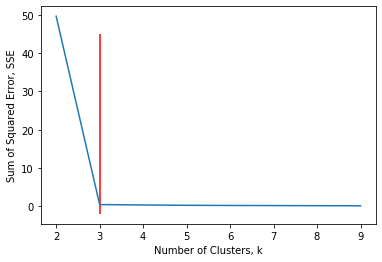

In [118]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# SSE initialized with empty value
# n_clusters is the "k" 
sse = {}
for n_cluster1 in range(2, 10):
    kmeans1 = KMeans(n_clusters = n_cluster1, max_iter = 500).fit(se_grouped_clustering)
    se_grouped_clustering["clusters"] = kmeans1.labels_
    
    # The inertia is the sum of distances of samples to their closest cluster centre
    sse[n_cluster1] = kmeans1.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters, k")
plt.ylabel("Sum of Squared Error, SSE")
# vertical line
plt.vlines(3, ymin = -2, ymax = 45, colors = 'red')
plt.show()

##### 4.1.1 Silhouette Coefficient

In [119]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster2 in range(2, 10):
    kmeans2 = KMeans(n_clusters = n_cluster2, random_state = 0).fit(se_grouped_clustering)
    label2 = kmeans2.labels_
    sil_coeff = silhouette_score(se_grouped_clustering, label2, metric = 'euclidean')
    print("Where n_clusters = {}, the Silhouette Coefficient is {}".format(n_cluster2, sil_coeff))

Where n_clusters = 2, the Silhouette Coefficient is 0.5833503976103016
Where n_clusters = 3, the Silhouette Coefficient is 0.633449997337898
Where n_clusters = 4, the Silhouette Coefficient is 0.6633778608764
Where n_clusters = 5, the Silhouette Coefficient is 0.7004627738693163
Where n_clusters = 6, the Silhouette Coefficient is 0.7406252605708044
Where n_clusters = 7, the Silhouette Coefficient is 0.7977647167333359
Where n_clusters = 8, the Silhouette Coefficient is 0.8788998355536197
Where n_clusters = 9, the Silhouette Coefficient is 0.9356399668129616


#### From the result, the high the n_clusters the better the silhouette coefficient. For this project, a cluster value of 5 will be used.

In [120]:
se_clusters.columns

Index(['Location', 'Borough', 'Postcode', 'Latitude', 'Longitude',
       'Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [121]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(se_clusters['Latitude'], se_clusters['Longitude'], se_clusters['Location'], se_clusters['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

display(map_clusters)

In [122]:
# CLUSTER 1
se_clusters.loc[se_clusters['Cluster Labels'] == 0, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Southwark,0,Café,Coffee Shop,Pub,Theater,Hotel,Italian Restaurant,Park,Street Food Gathering,Garden,Grocery Store
6,Southwark,0,Café,Coffee Shop,Pub,Theater,Hotel,Italian Restaurant,Park,Street Food Gathering,Garden,Grocery Store
7,Southwark,0,Café,Coffee Shop,Pub,Theater,Hotel,Italian Restaurant,Park,Street Food Gathering,Garden,Grocery Store
8,Southwark,0,Hotel,Coffee Shop,Theater,Scenic Lookout,Italian Restaurant,Grocery Store,Cocktail Bar,Pub,Street Food Gathering,Art Museum
18,Lambeth,0,Hotel,Coffee Shop,Theater,Scenic Lookout,Italian Restaurant,Grocery Store,Cocktail Bar,Pub,Street Food Gathering,Art Museum
22,Southwark,0,Coffee Shop,Café,Pub,Theater,Hotel,Italian Restaurant,Park,Cocktail Bar,Scenic Lookout,Grocery Store
23,Southwark,0,Coffee Shop,Café,Pub,Theater,Hotel,Italian Restaurant,Park,Cocktail Bar,Scenic Lookout,Grocery Store
30,Southwark,0,Hotel,Coffee Shop,Theater,Scenic Lookout,Italian Restaurant,Grocery Store,Cocktail Bar,Pub,Street Food Gathering,Art Museum


In [124]:
# CLUSTERS 2
se_clusters.loc[se_clusters['Cluster Labels'] == 1, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lewisham,1,Pub,Coffee Shop,Café,Park,Indian Restaurant,Italian Restaurant,Cocktail Bar,Bar,Gastropub,Food Truck
2,Lewisham,1,Pub,Coffee Shop,Café,Bar,Park,Gastropub,Garden,Vietnamese Restaurant,Italian Restaurant,History Museum
14,Lewisham,1,Pub,Café,Park,Gastropub,Garden,Coffee Shop,Gym / Fitness Center,Fish & Chips Shop,Restaurant,Food Truck
16,Lewisham,1,Pub,Coffee Shop,Café,Park,Gastropub,Supermarket,Italian Restaurant,Food Truck,Bar,Fish & Chips Shop
17,Lewisham,1,Pub,Coffee Shop,Café,Park,Gastropub,Supermarket,Italian Restaurant,Food Truck,Bar,Fish & Chips Shop
20,Lewisham,1,Pub,Café,Park,Gastropub,Garden,Coffee Shop,Gym / Fitness Center,Fish & Chips Shop,Restaurant,Food Truck
21,Lewisham,1,Pub,Coffee Shop,Café,Bar,Italian Restaurant,Gastropub,Park,Brewery,Indian Restaurant,Vegetarian / Vegan Restaurant
33,Lewisham,1,Pub,Coffee Shop,Café,Park,Indian Restaurant,Italian Restaurant,Cocktail Bar,Bar,Gastropub,Food Truck
42,Lewisham,1,Pub,Coffee Shop,Café,Park,Indian Restaurant,Italian Restaurant,Cocktail Bar,Bar,Gastropub,Food Truck


In [125]:
# CLUSTERS 3

se_clusters.loc[se_clusters['Cluster Labels'] == 2, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Lewisham,2,Grocery Store,Park,Pub,Café,Italian Restaurant,Train Station,Supermarket,Coffee Shop,Gym / Fitness Center,Gym
19,Lewisham,2,Grocery Store,Park,Pub,Café,Italian Restaurant,Train Station,Supermarket,Coffee Shop,Gym / Fitness Center,Gym
26,Lewisham,2,Grocery Store,Park,Supermarket,Café,Pub,Coffee Shop,Fast Food Restaurant,Italian Restaurant,Train Station,Trail
32,Lewisham,2,Grocery Store,Park,Supermarket,Café,Pub,Coffee Shop,Fast Food Restaurant,Italian Restaurant,Train Station,Trail
44,Lewisham,2,Grocery Store,Park,Supermarket,Café,Pub,Coffee Shop,Fast Food Restaurant,Italian Restaurant,Train Station,Trail
45,Lewisham,2,Grocery Store,Park,Pub,Café,Italian Restaurant,Train Station,Supermarket,Coffee Shop,Gym / Fitness Center,Gym


In [126]:
# CLUSTERS 4
se_clusters.loc[se_clusters['Cluster Labels'] == 3, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Southwark,3,Pub,Café,Coffee Shop,Bakery,Grocery Store,Park,Brewery,Farmers Market,Gym / Fitness Center,Italian Restaurant
9,Lewisham,3,Pub,Grocery Store,Coffee Shop,Café,Park,Gym / Fitness Center,Supermarket,Fish & Chips Shop,Gastropub,Pharmacy
10,Lambeth,3,Pub,Coffee Shop,Grocery Store,Café,Park,Italian Restaurant,Bakery,Pharmacy,Movie Theater,Train Station
11,Lambeth,3,Pub,Coffee Shop,Grocery Store,Café,Park,Italian Restaurant,Bakery,Pharmacy,Movie Theater,Train Station
15,Lewisham,3,Pub,Grocery Store,Coffee Shop,Café,Park,Gym / Fitness Center,Supermarket,Fish & Chips Shop,Gastropub,Pharmacy
29,Croydon,3,Pub,Grocery Store,Café,Coffee Shop,Supermarket,Platform,Park,Train Station,Hotel,Clothing Store
31,Croydon,3,Pub,Grocery Store,Café,Coffee Shop,Supermarket,Platform,Park,Train Station,Hotel,Clothing Store
37,Croydon,3,Pub,Park,Coffee Shop,Italian Restaurant,Café,Train Station,Bakery,Grocery Store,Gastropub,Movie Theater
39,Lewisham,3,Pub,Grocery Store,Park,Coffee Shop,Café,Italian Restaurant,Garden,Supermarket,Bakery,Bus Stop
40,Lambeth,3,Pub,Coffee Shop,Grocery Store,Café,Bakery,Park,Gym / Fitness Center,Pizza Place,Italian Restaurant,Pharmacy


In [127]:
# CLUSTERS 5
se_clusters.loc[se_clusters['Cluster Labels'] == 4, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Southwark,4,Café,Coffee Shop,Pub,Park,Italian Restaurant,Middle Eastern Restaurant,Grocery Store,Pizza Place,Cocktail Bar,Bar
4,Southwark,4,Café,Park,Pub,Pizza Place,Italian Restaurant,Gym / Fitness Center,Platform,Burger Joint,Mediterranean Restaurant,Indie Movie Theater
13,Lambeth,4,Coffee Shop,Pub,Cocktail Bar,Café,Pizza Place,Market,Park,Vegetarian / Vegan Restaurant,Burger Joint,Indie Movie Theater
24,Southwark,4,Pub,Café,Coffee Shop,Pizza Place,Park,Bar,Gastropub,Cocktail Bar,Art Gallery,Burger Joint
25,Lambeth,4,Café,Pub,Park,Coffee Shop,Theater,Hotel,Garden,Italian Restaurant,Concert Hall,Plaza
27,Southwark,4,Pub,Café,Coffee Shop,Pizza Place,Park,Bar,Gastropub,Cocktail Bar,Art Gallery,Burger Joint
28,Southwark,4,Pub,Brewery,Park,Coffee Shop,Beer Bar,Bar,Café,Gym / Fitness Center,Vietnamese Restaurant,Food Truck
34,Southwark,4,Pub,Brewery,Park,Coffee Shop,Beer Bar,Bar,Café,Gym / Fitness Center,Vietnamese Restaurant,Food Truck
35,Lambeth,4,Coffee Shop,Pub,Café,Park,Grocery Store,Pizza Place,Bakery,Italian Restaurant,Cocktail Bar,Brewery
36,Lambeth,4,Coffee Shop,Pub,Café,Park,Grocery Store,Pizza Place,Bakery,Italian Restaurant,Cocktail Bar,Brewery


#### 5. Result from Analysis in above steps
The following are the highlights of the 5 clusters above:

- Pubs, Cafe, Coffee Shops are popular in the South East London.
- As for restaurants, the Italian Restaurants are very popular in the South East London area. Especially in Southwark and Lambeth areas.
- With the Lewisham area being the most condensed area of Africans in the South East Area, it is surprising to see how in the top 10 venues, you can barely see restaurants in the top 5 venues.
- Although, the Clusters have variations, a very visible presence is the predominance of pubs.

#### 6. Conclusion


We can conclude with the results above that Cluster 2 and Cluster 3 are the most viable clusters to create a brand multi-cuisine Restaurant. Their proximity to other amenities and accessibility to Train station should be noticed. 

These 2 clusters do not have top restaurants that could rival their standards if they are created.

In conclusion, this project would have had better results if there were more data in terms of crime data within the area, traffic access and allowance of more venues exploration with the Foursquare (limited venues for free api calls).

Also, getting the ratings and feedbacks of the current restaurants within the clusters would have helped in providing more insight into the best location.